In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Set display options for pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploring Datasets

In [24]:
# Load data from 01_z_6.xls file in 2019 data folder
all_sales_df = pd.read_csv('../Data/raw_combined_data.csv')
all_sales_df.head(5)

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone
0,093 16 0 323.00,SINGLE FAMILY,83 FAIRFIELD AVE,NaN,NASHVILLE,2019-01-04,70000.00,20190109-0002281,No,No,1
1,105 03 0O 001.00,RESIDENTIAL CONDO,1114 A 2ND AVE S,NaN,NASHVILLE,2019-01-11,399900.00,20190116-0004327,No,No,1
2,105 03 0O 002.00,RESIDENTIAL CONDO,1114 B 2ND AVE S,NaN,NASHVILLE,2019-01-07,408500.00,20190109-0002326,No,No,1
3,105 03 0O 004.00,RESIDENTIAL CONDO,1116 B 2ND AVE S,NaN,NASHVILLE,2019-01-24,424900.00,20190129-0008471,No,No,1
4,105 07 0 395.00,SINGLE FAMILY,424 MALLORY ST,NaN,NASHVILLE,2019-01-18,160000.00,20190122-0006154,No,No,1


In [25]:
all_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74715 entries, 0 to 74714
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Parcel ID                          74714 non-null  object 
 1   Land Use                           74714 non-null  object 
 2   Property Address                   74714 non-null  object 
 3   Suite/ Condo   #                   9662 non-null   object 
 4   Property City                      74714 non-null  object 
 5   Sale Date                          74714 non-null  object 
 6   Sale Price                         74714 non-null  float64
 7   Legal Reference                    74714 non-null  object 
 8   Sold As Vacant                     74714 non-null  object 
 9   Multiple Parcels Involved in Sale  74714 non-null  object 
 10  Zone                               74715 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 6.3+ 

In [26]:
# Convert Sale Price to float
all_sales_df['Sale Price'] = all_sales_df['Sale Price'].astype(float)
all_sales_df.head()

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone
0,093 16 0 323.00,SINGLE FAMILY,83 FAIRFIELD AVE,NaN,NASHVILLE,2019-01-04,70000.00,20190109-0002281,No,No,1
1,105 03 0O 001.00,RESIDENTIAL CONDO,1114 A 2ND AVE S,NaN,NASHVILLE,2019-01-11,399900.00,20190116-0004327,No,No,1
2,105 03 0O 002.00,RESIDENTIAL CONDO,1114 B 2ND AVE S,NaN,NASHVILLE,2019-01-07,408500.00,20190109-0002326,No,No,1
3,105 03 0O 004.00,RESIDENTIAL CONDO,1116 B 2ND AVE S,NaN,NASHVILLE,2019-01-24,424900.00,20190129-0008471,No,No,1
4,105 07 0 395.00,SINGLE FAMILY,424 MALLORY ST,NaN,NASHVILLE,2019-01-18,160000.00,20190122-0006154,No,No,1


In [27]:
# Describe
all_sales_df.describe(include='all')

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone
count,74714,74714,74714,9662,74714,74714,74714.00,74714,74714,74714,74715.00
unique,61981,39,54110,2240,14,1227,NaN,70186,2,2,NaN
top,071 08 0 030.00,SINGLE FAMILY,1616 WEST END AVE,1,NASHVILLE,2021-04-30,NaN,20210826-0115321,No,No,NaN
freq,6,41748,199,131,51136,298,NaN,139,69822,68849,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,660169.04,NaN,NaN,NaN,4.29
std,NaN,NaN,NaN,NaN,NaN,NaN,2028497.43,NaN,NaN,NaN,2.67
min,NaN,NaN,NaN,NaN,NaN,NaN,49.00,NaN,NaN,NaN,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,255000.00,NaN,NaN,NaN,2.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,352847.50,NaN,NaN,NaN,4.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,522691.25,NaN,NaN,NaN,7.00


In [28]:
# Show details of records for the house with the max sale price and min sale price
max_sale_price_row = all_sales_df.loc[all_sales_df['Sale Price'].idxmax()]
min_sale_price_row = all_sales_df.loc[all_sales_df['Sale Price'].idxmin()]
print(max_sale_price_row)
print(min_sale_price_row)

Parcel ID                              091 07 2A 001.00
Land Use                              RESIDENTIAL CONDO
Property Address                     1216   49TH  AVE N
Suite/ Condo   #                                    NaN
Property City                                 NASHVILLE
Sale Date                                    2021-09-16
Sale Price                                  34130984.00
Legal Reference                        20210922-0127040
Sold As Vacant                                       No
Multiple Parcels Involved in Sale                   Yes
Zone                                                  3
Name: 51035, dtype: object
Parcel ID                                 147 14 0 164.00
Land Use                                    SINGLE FAMILY
Property Address                     690  CANDLESTICK  DR
Suite/ Condo   #                                      NaN
Property City                                   NASHVILLE
Sale Date                                      2019-02-12
Sale Pric

In [29]:
# Find Legal Reference 20210826-0115321 in all_sales_df to check on bulk sale
print(all_sales_df.loc[all_sales_df['Legal Reference'] == '20210826-0115321'])

              Parcel ID                 Land Use        Property Address  \
48554   174 00 0 249.00  VACANT RESIDENTIAL LAND        1163   SHIRE  DR   
48555  174 01 0A 900.00   RESIDENTIAL COMBO/MISC        0  RIVENDELL  CT   
48556  174 01 0B 001.00        RESIDENTIAL CONDO  5474  HICKORY PARK  DR   
48557  174 01 0B 003.00        RESIDENTIAL CONDO  5478  HICKORY PARK  DR   
48558  174 01 0B 004.00        RESIDENTIAL CONDO  5480  HICKORY PARK  DR   
...                 ...                      ...                     ...   
48688  174 01 0D 037.00        RESIDENTIAL CONDO        1259   SHIRE  DR   
48689  174 01 0D 038.00        RESIDENTIAL CONDO        1257   SHIRE  DR   
48690  174 01 0D 039.00        RESIDENTIAL CONDO        1255   SHIRE  DR   
48691  174 01 0D 040.00        RESIDENTIAL CONDO        1253   SHIRE  DR   
48692  174 01 0D 900.00  VACANT RESIDENTIAL LAND       1200 B  SHIRE  DR   

      Suite/ Condo   # Property City   Sale Date  Sale Price  \
48554              NaN 

In [30]:
all_sales_df.sort_values(by='Sale Price', ascending=False).tail(10)

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone
58240,053 14 0 012.00,VACANT RESIDENTIAL LAND,0 PAWNEE TRL,NaN,MADISON,2022-01-31,5000.00,20220209-0015158,Yes,No,6
61463,052 03 0 060.00,VACANT RESIDENTIAL LAND,914 WARD RD,NaN,MADISON,2022-03-01,4000.00,20220310-0027657,Yes,Yes,6
61462,052 03 0 059.00,VACANT RESIDENTIAL LAND,918 WARD RD,NaN,MADISON,2022-03-01,4000.00,20220310-0027657,Yes,Yes,6
66620,071 08 0 009.00,VACANT RESIDENTIAL LAND,0 QUEEN AVE,NaN,NASHVILLE,2022-06-06,3000.00,20220610-0066330,Yes,No,6
29042,161 09 0 048.00,VACANT RESIDENTIAL LAND,0 GRANBERRY HEIGHTS DR,NaN,BRENTWOOD,2020-09-16,2000.00,20200918-0107071,Yes,No,1
58865,148 14 0 188.00,SINGLE FAMILY,4705 COLEMONT PL,NaN,ANTIOCH,2022-02-28,350.00,20220302-0023935,No,No,1
40958,052 03 0 148.00,VACANT RESIDENTIAL LAND,424 LARKIN SPRINGS RD,NaN,MADISON,2021-04-28,100.00,20210503-0059305,Yes,No,6
717,052 13 0B 084.00,SINGLE FAMILY,1203 ALANDEE ST,NaN,NASHVILLE,2019-01-26,50.00,20190213-0013613,No,No,7
1125,147 14 0 164.00,SINGLE FAMILY,690 CANDLESTICK DR,NaN,NASHVILLE,2019-02-12,49.00,20190212-0013112,No,No,1
34740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [31]:
all_sales_df.sort_values(by='Sale Price', ascending=False).head(10)

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone
51042,091 07 2A 008.00,RESIDENTIAL CONDO,1200 49TH AVE N,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51064,091 07 2A 030.00,RESIDENTIAL CONDO,210 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51066,091 07 2A 032.00,RESIDENTIAL CONDO,216 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51067,091 07 2A 033.00,RESIDENTIAL CONDO,218 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51068,091 07 2A 034.00,RESIDENTIAL CONDO,220 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51069,091 07 2A 035.00,RESIDENTIAL CONDO,222 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51070,091 07 2A 036.00,RESIDENTIAL CONDO,224 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51071,091 07 2A 037.00,RESIDENTIAL CONDO,226 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51072,091 07 2A 038.00,RESIDENTIAL CONDO,228 FOUNDERS LN,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3
51035,091 07 2A 001.00,RESIDENTIAL CONDO,1216 49TH AVE N,NaN,NASHVILLE,2021-09-16,34130984.00,20210922-0127040,No,Yes,3


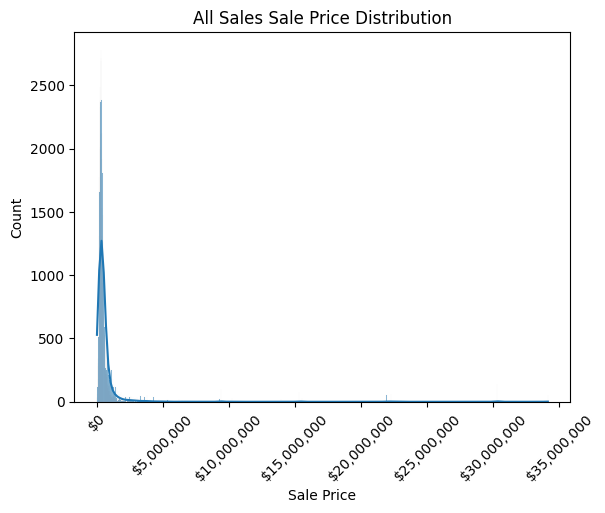

In [32]:
# Use seaborn to visualize distribution of Sale Price
sns.histplot(all_sales_df['Sale Price'], kde=True)
plt.title('All Sales Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

plt.show()

# Accounting for Bulk Sales 

In [33]:
# Group the Legal References and count the number of unique Parcel ID's for each
count_bulk_sales_df = all_sales_df.groupby('Legal Reference')['Parcel ID'].count().sort_values(ascending=False)

# Remove any Legal References with less than 2 unique Parcel ID's
count_bulk_sales_df = count_bulk_sales_df[count_bulk_sales_df >= 2]

# Convert count_bulk_sales_df to a DataFrame
count_bulk_sales_df = count_bulk_sales_df.to_frame().reset_index()
count_bulk_sales_df.columns = ['Legal Reference', 'Parcel Count']

# Add a Bulk column to the count_bulk_sales_df
count_bulk_sales_df['Bulk'] = 'Yes'

count_bulk_sales_df.head(10)

,Legal Reference,Parcel Count,Bulk
0,20210826-0115321,139,Yes
1,20190712-0068249,101,Yes
2,20210203-0015648,76,Yes
3,20190918-0094455,74,Yes
4,20210805-0105176,61,Yes
5,20220315-0029931,60,Yes
6,20191216-0129207,56,Yes
7,20210922-0127040,55,Yes
8,20221012-0111826,53,Yes
9,20200610-0059437,41,Yes


In [34]:
# Merge the bulk info into all_sales_df
all_sales_tagged_df = all_sales_df.merge(count_bulk_sales_df, on='Legal Reference', how='left')

# Fill NaN values for sales that are not bulk with "No"
all_sales_tagged_df['Bulk'] = all_sales_tagged_df['Bulk'].fillna('No')

# Fill NaN values for Suite/Condo # with "None" 
all_sales_tagged_df['Suite/ Condo   #'] = all_sales_tagged_df['Suite/ Condo   #'].fillna('None')

# Fill NaN values for Parcel Count with 1
all_sales_tagged_df['Parcel Count'] = all_sales_tagged_df['Parcel Count'].fillna(1)

# Convert Parcel Count to int
all_sales_tagged_df['Parcel Count'] = all_sales_tagged_df['Parcel Count'].astype(int)


all_sales_tagged_df[200:250]


,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone,Parcel Count,Bulk
200,103 08 0B 121.00,RESIDENTIAL CONDO,121 SLOAN RD,None,NASHVILLE,2019-01-23,310000.00,20190124-0007093,No,No,2,1,No
201,103 08 0B 316.00,RESIDENTIAL CONDO,316 SLOAN RD,B,NASHVILLE,2019-01-18,233900.00,20190123-0006459,No,No,2,1,No
202,103 08 0B 503.00,RESIDENTIAL CONDO,503 SLOAN RD,None,NASHVILLE,2019-01-29,219000.00,20190131-0009343,No,No,2,1,No
203,103 09 0 050.00,SINGLE FAMILY,813 KENDALL DR,None,NASHVILLE,2019-01-31,400000.00,20190201-0009964,No,No,2,1,No
204,103 09 0 063.00,SINGLE FAMILY,604 HILLWOOD BLVD,None,NASHVILLE,2019-01-30,575000.00,20190201-0009762,No,No,2,1,No
205,103 14 0A 009.00,RESIDENTIAL CONDO,4500 POST RD,9,NASHVILLE,2019-01-16,230000.00,20190117-0005017,No,No,2,1,No
206,103 15 0B 084.00,RESIDENTIAL CONDO,4487 POST PL,84,NASHVILLE,2019-01-16,192000.00,20190125-0007666,No,No,2,1,No
207,104 01 0 037.00,SINGLE FAMILY,258 38TH AVE N,None,NASHVILLE,2019-01-23,250000.00,20190124-0007173,No,No,2,1,No
208,104 01 0 271.00,DUPLEX,4001 NEBRASKA AVE,None,NASHVILLE,2019-01-15,340000.00,20190129-0008469,No,No,2,1,No
209,104 02 0A 013.00,RESIDENTIAL CONDO,201 ACKLEN PARK DR,13,NASHVILLE,2019-01-31,126000.00,20190201-0009728,No,No,2,1,No


In [35]:
# List all unique Land Use
print(all_sales_tagged_df['Land Use'].unique())

['SINGLE FAMILY' 'RESIDENTIAL CONDO' 'VACANT RESIDENTIAL LAND' 'DUPLEX'
 'ZERO LOT LINE' 'OFFICE BLDG (ONE OR TWO STORIES)' 'TRIPLEX'
 'RESIDENTIAL COMBO/MISC' 'MOBILE HOME' 'QUADPLEX' 'GREENBELT'
 'SMALL SERVICE SHOP' 'CONDOMINIUM OFC  OR OTHER COM CONDO' 'CHURCH'
 'SPLIT CLASS' 'DORMITORY/BOARDING HOUSE' 'GREENBELT/RES\r\nGRRENBELT/RES'
 'SCHOOL OR COLLEGE' 'DAY CARE CENTER' 'VACANT RESIDENTIAL' 'PARKING LOT'
 'MOBILE HOME PARK' 'GREENBELT/RES_x000D_\nGRRENBELT/RES' 'OPEN STORAGE'
 'LIGHT MANUFACTURING' 'NURSING HOME' 'FOREST' nan 'PARSONAGE'
 'RECREATIONAL' 'CLUB/UNION HALL/LODGE' 'MORTUARY/CEMETERY'
 'VACANT COMMERCIAL LAND' 'TRANSMITTING TOWERS' 'VACANT RURAL LAND'
 'SMALL WAREHOUSE' 'PARKING GARAGE' 'ONE STORY GENERAL RETAIL STORE'
 'APARTMENT: WALKUP ( BUILT PRIOR TO 1960 )' 'AUTO DEALER']


In [36]:
# Count the number of times each Land Use occurs
all_sales_tagged_df['Land Use'].value_counts().sort_index(ascending=False).to_frame('Count').reset_index()

,Land Use,Count
0,ZERO LOT LINE,1423
1,VACANT RURAL LAND,3
2,VACANT RESIDENTIAL LAND,5144
3,VACANT RESIDENTIAL,1
4,VACANT COMMERCIAL LAND,1
5,TRIPLEX,89
6,TRANSMITTING TOWERS,2
7,SPLIT CLASS,41
8,SMALL WAREHOUSE,3
9,SMALL SERVICE SHOP,1


In [37]:
# Create a new dataframe where Land Use is SINGLE FAMILY and Bulk is No
single_family_df = all_sales_tagged_df.loc[(all_sales_tagged_df['Land Use'] == 'SINGLE FAMILY') & (all_sales_tagged_df['Bulk'] == 'No')].copy()
single_family_df.describe(include='all')

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone,Parcel Count,Bulk
count,40466,40466,40466,40466,40466,40466,40466.00,40466,40466,40466,40466.00,40466.00,40466
unique,33987,1,33986,30,12,1160,NaN,40466,2,2,NaN,NaN,1
top,071 08 0 030.00,SINGLE FAMILY,2935 WINTERBERRY DR,None,NASHVILLE,2021-02-26,NaN,20190109-0002281,No,No,NaN,NaN,No
freq,6,40466,17,40436,25442,124,NaN,1,40364,40451,NaN,NaN,40466
mean,NaN,NaN,NaN,NaN,NaN,NaN,466458.61,NaN,NaN,NaN,4.31,1.00,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,468270.96,NaN,NaN,NaN,2.64,0.00,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,49.00,NaN,NaN,NaN,1.00,1.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,269900.00,NaN,NaN,NaN,2.00,1.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,351000.00,NaN,NaN,NaN,5.00,1.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,485000.00,NaN,NaN,NaN,7.00,1.00,NaN


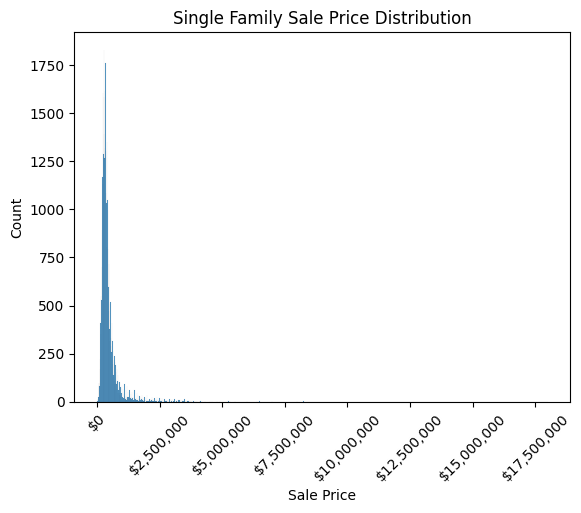

In [38]:
# Use seaborn to visualize distribution of Sale Price for single families
sns.histplot(single_family_df['Sale Price'], kde=False)
plt.title('Single Family Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

plt.show()


In [39]:
# Calculate the skeweness of the distribution
skew = single_family_df['Sale Price'].skew()
print(f'Skewness: {skew}')

Skewness: 7.2651080526485465


In [55]:
skewed_sales = single_family_df[single_family_df['Sale Price'] > 2000000]
num_skewed_sales = len(skewed_sales)
print(num_skewed_sales)

686


In [54]:
# Calculate percentiles from 0, 10, 20, ... 100%
percentiles = [i for i in range(0, 101, 10)]
percentile_values = single_family_df['Sale Price'].quantile([p/100 for p in percentiles]).to_dict()

# Calculate additional percentiles around the higher end (90, 95, 99, 99.5, 99.9)
high_end_percentiles = [90, 95, 99, 99.5, 99.9]
high_end_values = single_family_df['Sale Price'].quantile([p/100 for p in high_end_percentiles]).to_dict()

# Merge and print all percentile values
percentile_values.update(high_end_values)

# Displaying the percentile data
for percentile, value in sorted(percentile_values.items()):
    print(f"{percentile*100}%: ${value:,.2f}")

0.0%: $49.00
10.0%: $210,000.00
20.0%: $250,000.00
30.0%: $285,000.00
40.0%: $319,900.00
50.0%: $351,000.00
60.0%: $395,000.00
70.0%: $449,985.00
80.0%: $539,900.00
90.0%: $750,000.00
95.0%: $1,121,500.00
99.0%: $2,532,392.20
99.5%: $3,250,000.00
99.9%: $5,250,000.00
100.0%: $18,000,000.00


# Find Zip Codes

In [41]:
# import pandas as pd
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Load the dataframe
# df = pd.read_csv('../Data/raw_combined_data.csv')

# # Initialize Nominatim API
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Define a rate-limiter to respect service limits
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

# def get_zip_code(address):
#     try:
#         location = geocode(address)
#         if location:
#             return location.raw['address'].get('postcode', None)
#     except Exception as e:
#         print(f"Error obtaining ZIP code for address {address}: {str(e)}")
#         return None

# # Test on a small subset to ensure it works as expected
# df['zip_code'] = df['Property Address'].head(10).apply(get_zip_code)

# # If testing is successful and you're ready to process the full dataset:
# # df['zip_code'] = df['street'].apply(get_zip_code)

# df.to_csv('data/updated_raw_combined_data.csv', index=False)


# Train Model

## Preprocessing
Since the data is heavily right skewed, we will add a log transformation to the Sale Price.

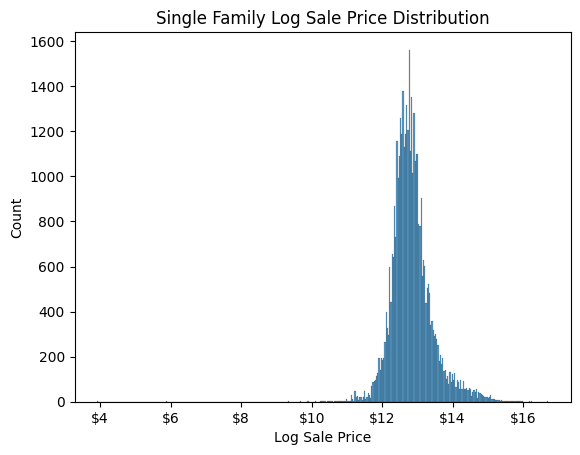

In [42]:
single_family_df['Log Sale Price'] = np.log(single_family_df['Sale Price'] + 1)
sns.histplot(single_family_df['Log Sale Price'], kde=False)
plt.title('Single Family Log Sale Price Distribution')
plt.xlabel('Log Sale Price')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))


In [43]:
single_family_df.head()

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Zone,Parcel Count,Bulk,Log Sale Price
0,093 16 0 323.00,SINGLE FAMILY,83 FAIRFIELD AVE,None,NASHVILLE,2019-01-04,70000.00,20190109-0002281,No,No,1,1,No,11.16
4,105 07 0 395.00,SINGLE FAMILY,424 MALLORY ST,None,NASHVILLE,2019-01-18,160000.00,20190122-0006154,No,No,1,1,No,11.98
7,106 13 0 015.00,SINGLE FAMILY,2083 WHITNEY AVE,None,NASHVILLE,2019-01-18,230000.00,20190122-0005803,No,No,1,1,No,12.35
8,106 14 0 105.03,SINGLE FAMILY,90 LYLE LN,None,NASHVILLE,2019-01-16,160000.00,20190122-0005816,No,No,1,1,No,11.98
9,118 04 0 094.00,SINGLE FAMILY,534 FAIRLANE DR,None,NASHVILLE,2019-01-14,230000.00,20190116-0004315,No,No,1,1,No,12.35
